# DSC 540 - Data Preparation

# Week7 and Week 8

# Project Milestone 3


# Cleaning/Formatting Web Data source

Perform at least 5 data transformation and/or cleansing steps to your website data. The 5 data transformations that I will do are as follows:

Data transformation replaces the original column headers with a new set of headers. It assigns a list of new column names.

This transformation converts the 'Time' column from the original Unix timestamp format to a human-readable date and time format using the pandas to_datetime() method. 

This transformation rounds the values in the 'Amount' column to two decimal places 

check the duplicates that contains all rows from the original DataFrame that have duplicate values in all columns except the last one. 

Data transformation drops all the duplicate rows in the dataset, keeping only the first occurrence of each unique row

Data transformation in this code involves creating a box plot of the 'Amount' column in the pandas DataFrame using the seaborn library. A box plot is a graphical representation of the distribution of the data that shows the median, quartiles, and outliers of the data. This visualization can help to identify any potential outliers or unusual values in the 'Amount' column.

Check for missing values in any of the columns that will be kept in the final data set.

Data transformation , all values in the "Class" column of the dataframe were converted to lowercase. This was done to ensure consistency in the casing of values in the column. The unique values in the "Class" column were then printed to confirm that the transformation was successful.

Data trnsformation, calculates the lower and upper bounds for outliers in the 'Amount' column using the interquartile range (IQR) and identifies the rows with transaction amounts outside the bounds.

Ethical Implications: The credit card fraud detection dataset available on datahub.io raises several ethical implications. Firstly, it involves the use of sensitive financial data of individuals without their explicit consent. The dataset includes transactions made by credit cards in September 2013 by European cardholders. Although the dataset is anonymized, it is still possible for fraudsters to reverse engineer the data to extract the personal information of individuals. While such algorithms are essential to protect consumers from fraudulent activities, there is a potential risk of false positives leading to wrongful accusations of fraud. Lastly, the availability of such datasets can also be exploited by malicious actors for nefarious purposes. Hackers can use these datasets to train their own fraud detection algorithms, thus undermining the security measures of credit card companies and individuals.Therefore, it is important to handle such datasets with care, implement appropriate security measures to safeguard the data, and ensure that the use of such algorithms does not result in discriminatory practices.




In [162]:
#Load the required libraries

import pandas as pd
import numpy as np
import xlrd
from bs4 import BeautifulSoup
import numpy as np
import datapackage
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# To access the Credit card web data source

data_url = 'https://datahub.io/machine-learning/creditcard/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

In [164]:
# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        df = pd.read_csv(resource.descriptor['path'])
        print (df)
       
   

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [165]:
# Transformation 1: Replace headers

# Step #1: Replace headers
headers = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount", "Class"]
df.columns = headers
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [166]:
#Transformation 2: Convert time to a readable format

df["Time"] = pd.to_datetime(df["Time"], unit="s")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [167]:
#Transformation 3: Convert amount to a float with two decimal places

df['Amount'] = np.round(df['Amount'], 2)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [168]:
# Transformation 4. Identify any duplicate rows

df_duplicates = df[df.duplicated(subset=df.columns[:-1], keep=False)]
print(df_duplicates)



                      Time        V1        V2        V3        V4        V5  \
32     1970-01-01 00:00:26 -0.529912  0.873892  1.347247  0.145457  0.414209   
33     1970-01-01 00:00:26 -0.529912  0.873892  1.347247  0.145457  0.414209   
34     1970-01-01 00:00:26 -0.535388  0.865268  1.351076  0.147575  0.433680   
35     1970-01-01 00:00:26 -0.535388  0.865268  1.351076  0.147575  0.433680   
112    1970-01-01 00:01:14  1.038370  0.127486  0.184456  1.109950  0.441699   
...                    ...       ...       ...       ...       ...       ...   
283485 1970-01-02 23:40:27 -1.457978  1.378203  0.811515 -0.603760 -0.711883   
284190 1970-01-02 23:50:33 -2.667936  3.160505 -3.355984  1.007845 -0.377397   
284191 1970-01-02 23:50:33 -2.667936  3.160505 -3.355984  1.007845 -0.377397   
284192 1970-01-02 23:50:33 -2.691642  3.123168 -3.339407  1.017018 -0.293095   
284193 1970-01-02 23:50:33 -2.691642  3.123168 -3.339407  1.017018 -0.293095   

              V6        V7        V8   

In [169]:
# Transformation 5. drops all the duplicate rows in the dataset
df = df.drop_duplicates()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


<AxesSubplot:xlabel='Amount'>

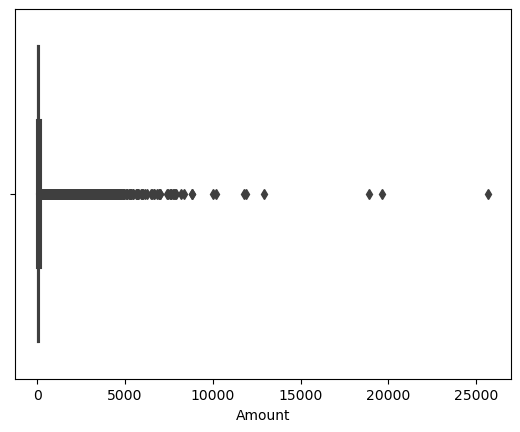

In [170]:
# Transforamtion 6: will create a boxplot of the 'Amount' variable, showing the distribution of values in the column. 
#The box represents the interquartile range (IQR) of the data, 
#while the whiskers extend to the minimum and maximum values within 1.5 times the IQR.

sns.boxplot(x=df['Amount'])


In [171]:
# Transformation 7. Identify any missing values

missing_values = df.isnull().sum().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 0


In [172]:
## Transformation 8. Find the Outilier for the Amount

# Calculate summary statistics for the transaction amount column
amount_stats = df['Amount'].describe()

# Calculate the interquartile range (IQR)
Q1 = amount_stats['25%']
Q3 = amount_stats['75%']
IQR = Q3 - Q1

# Find the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify the rows with transaction amounts outside the bounds
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

# Print the number of outliers found
print("Number of outliers found:", len(outliers))

Number of outliers found: 31685


In [173]:
# Transformation 9: Fix casing or inconsistent values

# Convert all values in the "Class" column to lowercase
df['Class'] = df['Class'].str.lower()

# Check the unique values in the "Class" column after fixing casing
print(df['Class'].unique())

["'0'" "'1'"]


In [174]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
